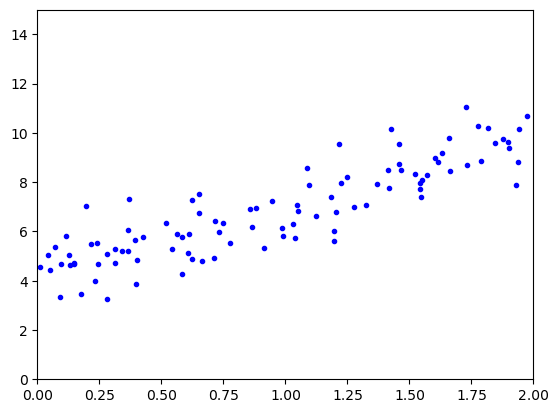

In [26]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)


X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) # sampling from normal distribution makes the chart look more natural

plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [27]:
def plot_predictions(result):
    X_new = np.array([[0], [2]])
    X_new_b = np.c_[np.ones((2, 1)), X_new]
    y_pred = X_new_b.dot(result)

    plt.plot(X_new, y_pred, 'r-')
    plt.plot(X, y, 'b.')
    plt.axis([0, 2, 0, 15])

$m = sample size$<br/>
$\theta = model weights$<br/>

Since the Mean Squared Error function is: <br/>
$MSE(X, h_0)={1 \over m} * \sum_{i=1}^m(\theta^T x^i - y^i)^2$<br/>
MSE derivative is:<br/>
${\partial \over \partial \theta_{j}} MSE(\theta) = {2 \over m} * \sum_{i=1}^m(\theta^T x^i - y^i)x^i$<br/>
Which can be represented as the below in vector form: <br />
$\nabla_{\theta}MSE(\theta) = {2 \over m} X^T(X \theta - y)$<br />
Gradient equation in the below function is the same as the above equation.

In [28]:
def linear_regression_gradient_descent(X, y, theta, eta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    gradient = 2/(X.shape[0]) * X_b.T.dot(X_b.dot(theta) - y)

    return theta - eta * gradient

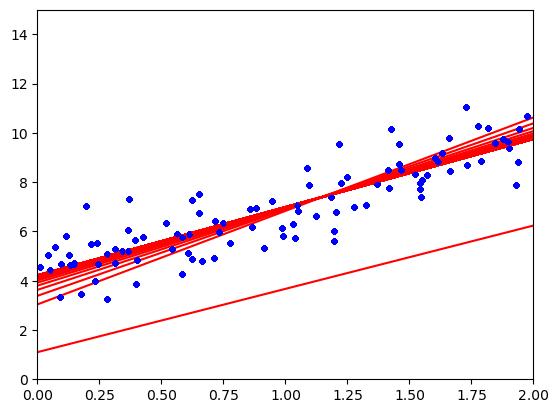

array([[4.21509616],
       [2.77011339]])

In [29]:
n_iterations = 1000
theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    theta = linear_regression_gradient_descent(X, y, theta, .1)

    if iteration % 10 == 0:
        plot_predictions(theta)

plt.show()
theta

In the below 2 is not divided by X's shape, because on each pass a random index is selected and a sample under that index is taken for the calculations - only one sample, not the whole set and neither a batch.

In [30]:
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

def linear_regression_stochastic_gradient_descent(X, y, theta, epoch):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    random_idx = np.random.randint(X.shape[0])
    xi = X_b[random_idx:random_idx + 1]
    yi = y[random_idx:random_idx + 1]
    gradient = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * X.shape[0] + 1)

    return theta - eta * gradient

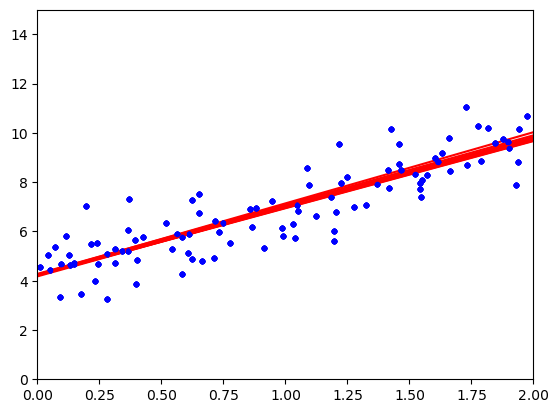

array([[4.18494206],
       [2.72983513]])

In [31]:
n_epochs = 50
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(X.shape[0]):
        theta = linear_regression_stochastic_gradient_descent(X, y, theta, epoch)

    if epoch % 5 == 0:
        plot_predictions(theta)

plt.show()
theta

In [32]:
def linear_regression_minibatch_stochastic_gradient_descent(X, y, theta, epoch, batch_size):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    random_idx = np.random.randint(X.shape[0] - batch_size)
    xi = X_b[random_idx:random_idx + batch_size + 1]
    yi = y[random_idx:random_idx + batch_size + 1]
    gradient = 2 / batch_size * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * X.shape[0] + 1)

    return theta - eta * gradient

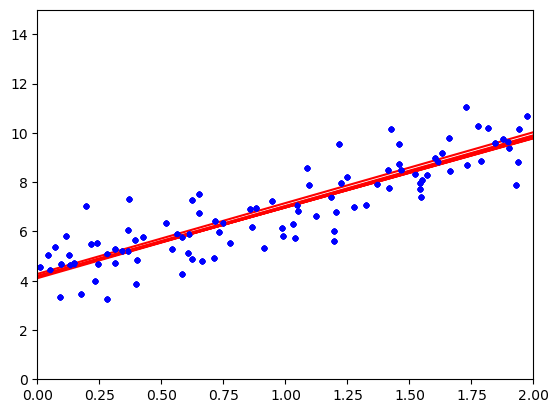

array([[4.1841832 ],
       [2.82295769]])

In [33]:
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(X.shape[0]):
        theta = linear_regression_minibatch_stochastic_gradient_descent(X, y, theta, epoch, 5)

    if epoch % 5 == 0:
        plot_predictions(theta)

plt.show()
theta